In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -v python-mecab-ko

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv", filename="finance_data.csv")

('finance_data.csv', <http.client.HTTPMessage at 0x7fc1ee9b9090>)

In [5]:
data = pd.read_csv('finance_data.csv')
data['labels'] = data['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
del data['sentence']

# 중복 제거
data.drop_duplicates(subset=['kor_sentence'], inplace=True)

In [6]:
# 한국어만 남기고 싶으면
data['kor_sentence'] = [re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',' ',s) for s in data['kor_sentence']]
# 특수용어 삭제
#data['kor_sentence'] = [re.sub('[^A-Za-z0-9가-힣]', ' ', s) for s in data['kor_sentence']]

In [7]:
data.columns = ['label', 'title']

In [18]:
news_labeling = pd.read_csv('/content/drive/MyDrive/경희대/KHUDA/데비_프로젝트/데이터/labeling_news.csv')
news_labeling['title'] = [re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',' ',s) for s in news_labeling['title']]

In [19]:
senti_df = pd.read_csv('/content/drive/MyDrive/경희대/KHUDA/데비_프로젝트/데이터/senti.csv')
del senti_df['Unnamed: 0']

In [14]:
data = pd.concat([data,news_labeling,senti_df])
data

,label,title
0,0,에 따르면 그 회사는 회사가 성장하고 있는 곳이지만 모든 생산을 러시아로...
1,0,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 만 평...
2,2,국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며 이전의 ...
3,1,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,1,년 회사의 업데이트된 전략에 따르면 는 ...
...,...,...
14806,0,반신반의
14807,1,신비
14808,2,아리송
14809,2,알쏭하


In [15]:
#인덱스 초기화 -> 0부터 정렬
data = data.reset_index(drop=True)
data

,label,title
0,0,에 따르면 그 회사는 회사가 성장하고 있는 곳이지만 모든 생산을 러시아로...
1,0,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 만 평...
2,2,국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며 이전의 ...
3,1,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,1,년 회사의 업데이트된 전략에 따르면 는 ...
...,...,...
20657,0,반신반의
20658,1,신비
20659,2,아리송
20660,2,알쏭하


In [16]:
import mecab
mecab = mecab.MeCab()

In [17]:
data['tokenized'] = data['title'].apply(mecab.morphs)
data

,label,title,tokenized
0,0,에 따르면 그 회사는 회사가 성장하고 있는 곳이지만 모든 생산을 러시아로...,"[에, 따르, 면, 그, 회사, 는, 회사, 가, 성장, 하, 고, 있, 는, 곳,..."
1,0,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 만 평...,"[테크노폴리스, 는, 컴퓨터, 기술, 과, 통신, 분야, 에서, 일, 하, 는, 회..."
2,2,국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며 이전의 ...,"[국제, 전자, 산업, 회사, 인, 엘코, 텍, 은, 탈린, 공장, 에서, 수십, ..."
3,1,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,"[새로운, 생산, 공장, 으로, 인해, 회사, 는, 예상, 되, 는, 수요, 증가,..."
4,1,년 회사의 업데이트된 전략에 따르면 는 ...,"[년, 회사, 의, 업데이트, 된, 전략, 에, 따르, 면, 는, 범위, 의, 장기..."
...,...,...,...
20657,0,반신반의,[반신반의]
20658,1,신비,[신비]
20659,2,아리송,[아리송]
20660,2,알쏭하,"[알, 쏭, 하]"


In [20]:
# 불용어 제거
data['remove_stopwords']=None
stopwords = ['유로','라고','밝혔','대한','명','된다','부터','에게','등','리','관한','드','한다고','몇','코네','던','노','비','았','입니다','할','적','습니다','는다','니','저','로','것','핀란드','만','어','및','다고','고','된','될','약','게','며','지','합니다','아','또','때','겠','뿐','고','있','수','하','기','년','인','되','면','한다','에서','그','했','다','을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
for i in range(len(data)):
  stopwords_removed_sentence = [word for word in data.iloc[i,2] if not word in stopwords] # 불용어 제거
  data['remove_stopwords'][i] = stopwords_removed_sentence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data

,label,title,tokenized,remove_stopwords
0,0,에 따르면 그 회사는 회사가 성장하고 있는 곳이지만 모든 생산을 러시아로...,"[에, 따르, 면, 그, 회사, 는, 회사, 가, 성장, 하, 고, 있, 는, 곳,...","[따르, 회사, 회사, 성장, 곳, 지만, 모든, 생산, 러시아, 옮길, 계획, 없]"
1,0,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 만 평...,"[테크노폴리스, 는, 컴퓨터, 기술, 과, 통신, 분야, 에서, 일, 하, 는, 회...","[테크노폴리스, 컴퓨터, 기술, 통신, 분야, 일, 회사, 유치, 위해, 평방, 미..."
2,2,국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며 이전의 ...,"[국제, 전자, 산업, 회사, 인, 엘코, 텍, 은, 탈린, 공장, 에서, 수십, ...","[국제, 전자, 산업, 회사, 엘코, 텍, 탈린, 공장, 수십, 직원, 해고, 했으..."
3,1,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,"[새로운, 생산, 공장, 으로, 인해, 회사, 는, 예상, 되, 는, 수요, 증가,...","[새로운, 생산, 공장, 인해, 회사, 예상, 수요, 증가, 충족, 시킬, 능력, ..."
4,1,년 회사의 업데이트된 전략에 따르면 는 ...,"[년, 회사, 의, 업데이트, 된, 전략, 에, 따르, 면, 는, 범위, 의, 장기...","[회사, 업데이트, 전략, 따르, 범위, 장기, 순, 매출, 성장, 목표, 으며, ..."
...,...,...,...,...
20657,0,반신반의,[반신반의],[반신반의]
20658,1,신비,[신비],[신비]
20659,2,아리송,[아리송],[아리송]
20660,2,알쏭하,"[알, 쏭, 하]","[알, 쏭]"


In [22]:
X_data = data['remove_stopwords']
y_data = data['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data, shuffle=True)

In [24]:
max_features = 3500 #빈도수 상위 ##개 사용
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])

[[29], [867], [325, 714], [2779], [3394, 125, 130, 988, 2100, 94, 98, 481, 207, 808, 93, 989, 321, 215, 82, 11, 2780, 14, 1684, 506, 348, 1884, 4]]
[[1791, 1155, 656, 468, 1262, 50, 266, 803, 125, 3379, 656, 468, 1262, 6], [1245, 10, 292, 664, 2267, 47, 166], [104], [29, 17], [452, 2882]]


In [25]:
# vocab_size = 5
# words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
# print(word_to_index)

In [26]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size) # 단어 개수

10285


In [27]:
word_to_index

{'월': 1,
 '회사': 2,
 '일': 3,
 '말': 4,
 '었': 5,
 '증가': 6,
 '서비스': 7,
 '주': 8,
 '분기': 9,
 '업체': 10,
 '그룹': 11,
 '삼성전자': 12,
 '카카오': 13,
 '영업': 14,
 '이익': 15,
 '억': 16,
 '않': 17,
 '시장': 18,
 '순': 19,
 '계약': 20,
 '사업': 21,
 '투자': 22,
 '예정': 23,
 '없': 24,
 '주식': 25,
 '매출': 26,
 '까지': 27,
 '못하': 28,
 '좋': 29,
 '못': 30,
 '제공': 31,
 '마음': 32,
 '였': 33,
 '총': 34,
 '몹시': 35,
 '나': 36,
 '포스코': 37,
 '공장': 38,
 '발표': 39,
 '성': 40,
 '맵': 41,
 '기간': 42,
 '제조': 43,
 '칼': 44,
 '포함': 45,
 '케미': 46,
 '개발': 47,
 '생산': 48,
 '제품': 49,
 '감소': 50,
 '데': 51,
 '모양': 52,
 '위한': 53,
 '새로운': 54,
 '인수': 55,
 '중': 56,
 '개': 57,
 '대': 58,
 '보': 59,
 '자꾸': 60,
 '전자': 61,
 '키': 62,
 '고객': 63,
 '받': 64,
 '솔루션': 65,
 '기술': 66,
 '시': 67,
 '해': 68,
 '기업': 69,
 '사람': 70,
 '매출액': 71,
 '여': 72,
 '직원': 73,
 '같': 74,
 '오이': 75,
 '공급': 76,
 '사용': 77,
 '은행': 78,
 '기록': 79,
 '으며': 80,
 '라': 81,
 '두': 82,
 '운영': 83,
 '오늘': 84,
 '삼성': 85,
 '예상': 86,
 '비해': 87,
 '판매': 88,
 '사': 89,
 '달러': 90,
 '지분': 91,
 '재': 92,
 '우리': 93,
 '이번': 94,

본문의 최대 길이 : 37
본문의 평균 길이 : 4.415451630467663


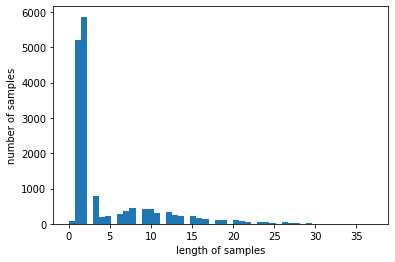

In [28]:
print('본문의 최대 길이 :',max(len(sent) for sent in X_train))
print('본문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(sent) for sent in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
# drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# # 빈 샘플들을 제거
# X_train = np.delete(X_train, drop_train, axis=0)
# y_train = np.delete(y_train, drop_train, axis=0)
# print(len(X_train))
# print(len(y_train))

In [30]:
max_len = 25

In [31]:
X_train_encoded = pad_sequences(X_train_encoded, maxlen=max_len)
X_test_encoded = pad_sequences(X_test_encoded, maxlen=max_len)

In [32]:
X_train_encoded[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 29], dtype=int32)

In [33]:
X_train_encoded.shape

(16529, 25)

In [34]:
X_test_encoded.shape

(4133, 25)

In [35]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
embedding_dim = 25
hidden_units = 64
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_encoded, y_train, 
                    epochs=2, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/2
403/414 [============================>.] - ETA: 0s - loss: 0.7025 - acc: 0.6752
Epoch 1: val_acc improved from -inf to 0.81791, saving model to best_model4.h5
414/414 [==============================] - 5s 6ms/step - loss: 0.6976 - acc: 0.6789 - val_loss: 0.4908 - val_acc: 0.8179
Epoch 2/2
411/414 [============================>.] - ETA: 0s - loss: 0.3816 - acc: 0.8497
Epoch 2: val_acc improved from 0.81791 to 0.84180, saving model to best_model4.h5
414/414 [==============================] - 2s 5ms/step - loss: 0.3819 - acc: 0.8494 - val_loss: 0.4201 - val_acc: 0.8418


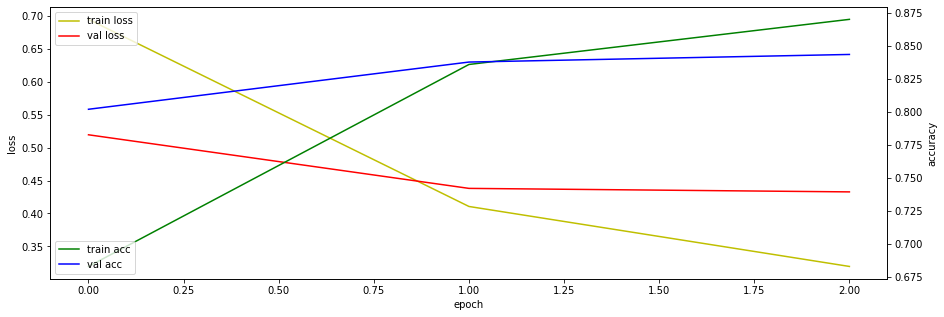

In [54]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(15,5))

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'g', label='train acc')
acc_ax.plot(history.history['val_acc'], 'b', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [55]:
score = model.evaluate(X_test_encoded, y_test)
print('loss', score[0])
print('accuracy', score[1])

130/130 [==============================] - 0s 3ms/step - loss: 0.4323 - acc: 0.8304
loss 0.4322700500488281
accuracy 0.8303895592689514


In [56]:
loaded_model = load_model('best_model4.h5')

In [57]:
model.save('lstm_model_4.h5')